# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.144545e+01     1.517011e+01
 * time: 0.09758186340332031
     1     6.069166e+01     1.011923e+01
 * time: 0.10623884201049805
     2     5.540669e+01     1.284006e+01
 * time: 0.12754201889038086
     3     3.947936e+01     8.571266e+00
 * time: 0.1574258804321289
     4     3.000974e+01     7.878315e+00
 * time: 0.1883540153503418
     5     2.604632e+01     7.049383e+00
 * time: 0.2160649299621582
     6     1.192911e+01     2.239634e+00
 * time: 0.2945840358734131
     7     1.152694e+01     4.592402e+00
 * time: 0.3115520477294922
     8     1.034764e+01     3.363670e+00
 * time: 0.33254504203796387
     9     9.231340e+00     5.679403e+00
 * time: 0.3538649082183838
    10     8.393197e+00     3.363926e+00
 * time: 0.37517404556274414
    11     7.752463e+00     4.031076e+00
 * time: 0.3923459053039551
    12     7.361997e+00     3.140062e+00
 * time: 0.45070695877075195
    13     7.113714e+00     3.516849e+00
 * time: 0.4697

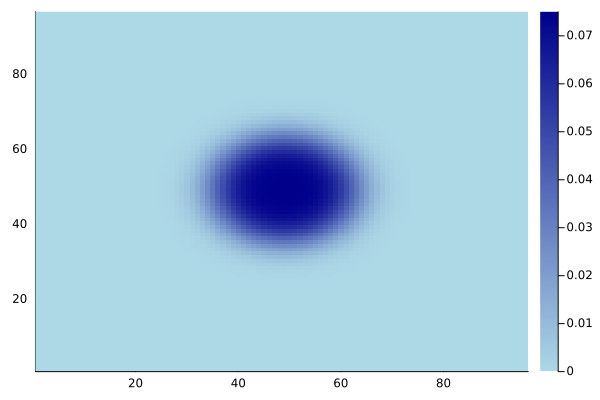

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)